<a href="https://colab.research.google.com/github/nguyenqchi/SocialMediaApp/blob/main/Time_Series_Price_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Read the data

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('Nat_Gas.csv')

#change date to date data type
data['Dates'] = pd.to_datetime(data['Dates'])
data = data.sort_values(by='Dates')

data.head()

,Dates,Prices
0,2020-10-31,10.1
1,2020-11-30,10.3
2,2020-12-31,11.0
3,2021-01-31,10.9
4,2021-02-28,10.9


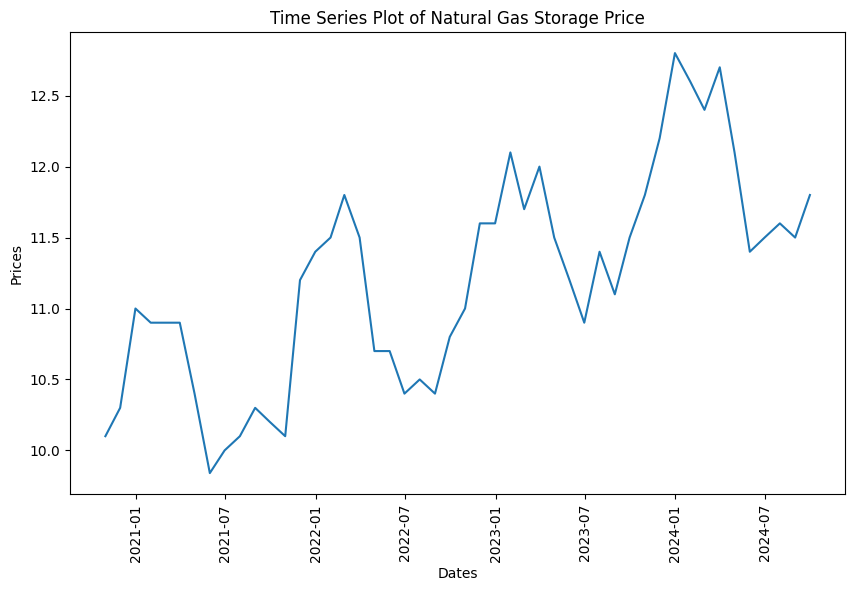

In [10]:
# Create a time series plot
plt.figure(figsize=(10, 6))
plt.plot(data['Dates'], data['Prices'])
plt.title('Time Series Plot of Natural Gas Storage Price')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

3. Estimate the price for each day using Linear Interpolation

In [12]:
def interpolate_price(date_to_predict, data):
    # Find the nearest dates before and after the prediction date
    before_date = data[data['Dates'] <= date_to_predict].iloc[-1]
    after_date = data[data['Dates'] >= date_to_predict].iloc[0]

    # Perform linear interpolation
    price_before = before_date['Prices']
    price_after = after_date['Prices']
    time_diff = (after_date['Dates'] - before_date['Dates']).days
    price_predicted = price_before + (price_after - price_before) * (date_to_predict - before_date['Dates']).days / time_diff

    return price_predicted

# Test
date_to_predict = pd.to_datetime('2023-08-20')
predicted_price = interpolate_price(date_to_predict, data)
print("Estimated price on",date_to_predict ,"is: $", predicted_price)

Estimated price on 2023-08-20 00:00:00 is: $ 11.206451612903226
